# Executing IBM Quantum system

**Instructor** : Hwajung Kang, Ph.D., Education Delivery Program Manager, IBM Quantum

In [1]:
from qiskit import *
from qiskit.visualization import plot_distribution, plot_error_map
from qiskit.quantum_info import hellinger_fidelity

from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider

**Q. Simulate the following 4 qubit GHZ circuit using `AerSimulator` and plot the result using `plot_distribution`.**

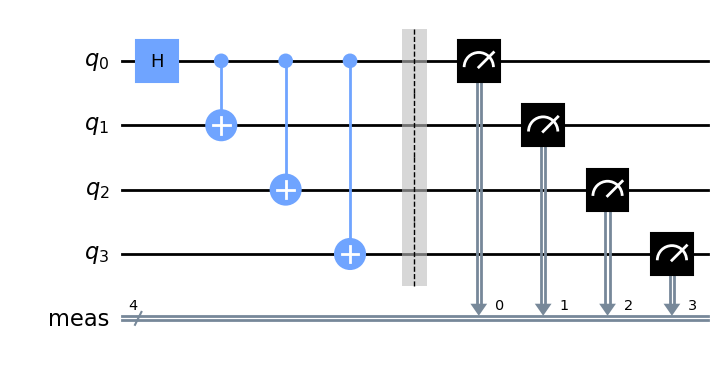

In [29]:
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, range(1, 4))
qc.measure_all()
qc.draw('mpl')

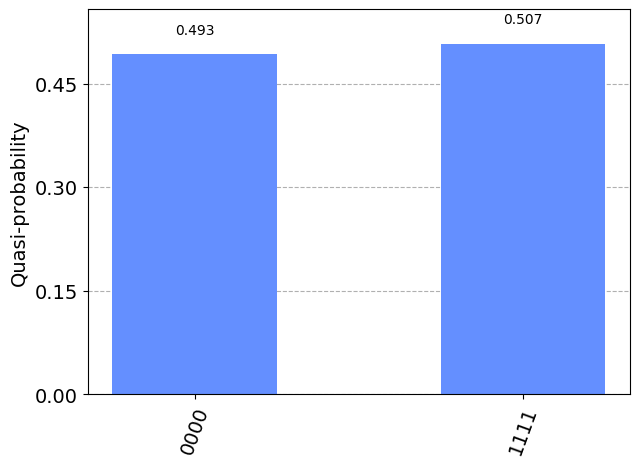

In [3]:
## your code goes here.
sim = AerSimulator()

counts_sim = sim.run(qc).result().get_counts()
plot_distribution(counts_sim)

Run the following cells to access `ibmq_quito`, the 5 qubit quantum system.  

In [4]:
prov = IBMProvider()

In [5]:
backendT = prov.get_backend('ibmq_quito')

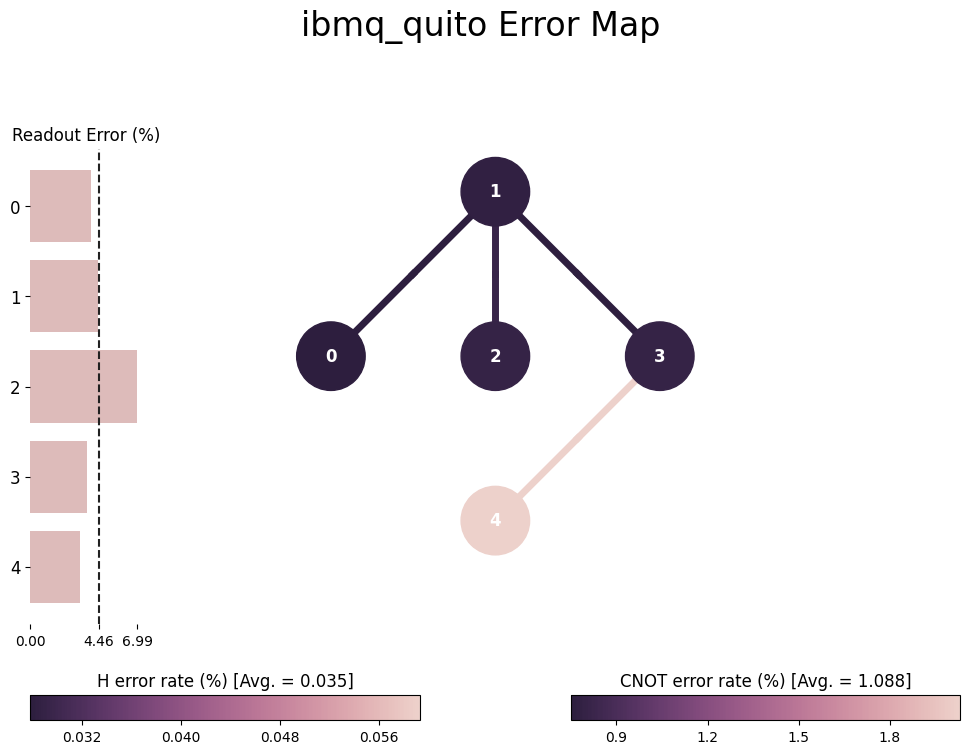

In [6]:
plot_error_map(backendT)

In [28]:
conf = backendT.configuration()

print('backend:{}'.format(backendT.name))
print('num_qubit:{}, QV:{}, CLOP:{}\n'.format(conf.num_qubits, conf.quantum_volume, conf.clops))
print('max_num_circuits:{},'.format(conf.max_experiments), 
      'max_shots:{}\n'.format(conf.max_shots)) #default num_shots = 4000
print('basis gates:{}'.format(conf.basis_gates),'\n')
print('coupling map:{}'.format(conf.coupling_map))

#backend.configuration().to_dict()

backend:ibmq_quito
num_qubit:5, QV:16, CLOP:2506

max_num_circuits:300, max_shots:100000

basis gates:['cx', 'id', 'rz', 'sx', 'x'] 

coupling map:[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


Upon running the cell below, you will get the information about the backend `ibmq_quito`.

You can also learn about `ibm_quito` [here](https://quantum-computing.ibm.com/services?services=systems&system=ibmq_quito).

## Qiskit Transpiler

**Transpiler steps**

1. Express circuit in the native gate sets of a backend: ['id', 'rz', 'sx', 'x', 'cx', 'reset'] (identical across the most of the hardwares) 
2. Initial layout (using different algorithms and objectives depending on the optimization level)
3. SWAP routing - make the circuit compatible with the coupling map


4. Optimize 1 qubit and 2 qubit gates (using differnt level of algorithms depending on the optimization level)
5. Remapping the circuit to a low noise subgraph (Mapomatic - [paper](https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.4.010327))

### Understand transpiled circuit

The following cell is to transpile `qc` for the `backendT`.
Execute the cell below several times. **Do you get identical transpiled circuit all the time?**

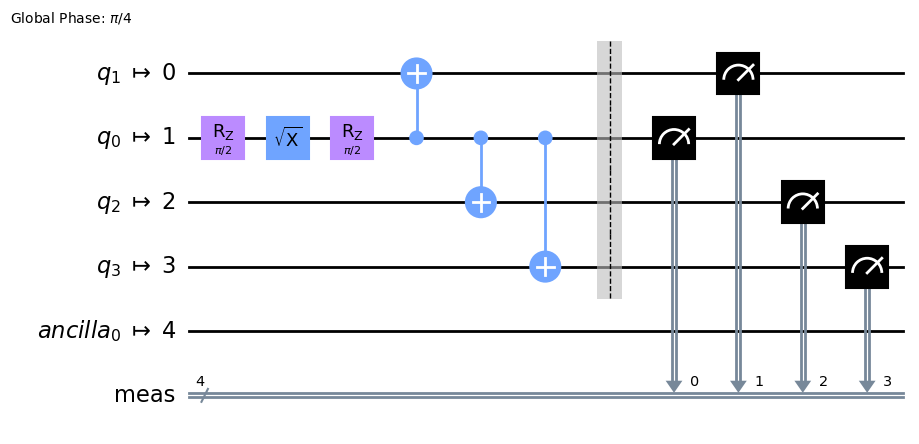

In [30]:
qc_transT = transpile(qc, backendT)
qc_transT.draw('mpl')

**Q. Compare the number of qubits and number of CNOT gates in the circuits `qc` and `qc_transT`. Discuss the reasons for the difference.**

In [31]:
## your answer

print('* Number of qubits')
print('qc:{}   qc_trans:{}\n'.format(qc.num_qubits, qc_transT.num_qubits))
print('* Number of CNOTs')
print('qc:{}   qc_trans:{}'.format(qc.num_nonlocal_gates(), qc_transT.num_nonlocal_gates()))

* Number of qubits
qc:4   qc_trans:5

* Number of CNOTs
qc:3   qc_trans:3


**Q. Which physical qubits are mapped to which virtual qubits initially and finally?**

In [32]:
## your answer
# List of physical qubits mapped to the virtual qubits [0, 1, 2, 3]
Initial_layout = [] 
Final_mapping = []

**Q. Set the initial layout manually to understand how it impacts the transpiled result.**

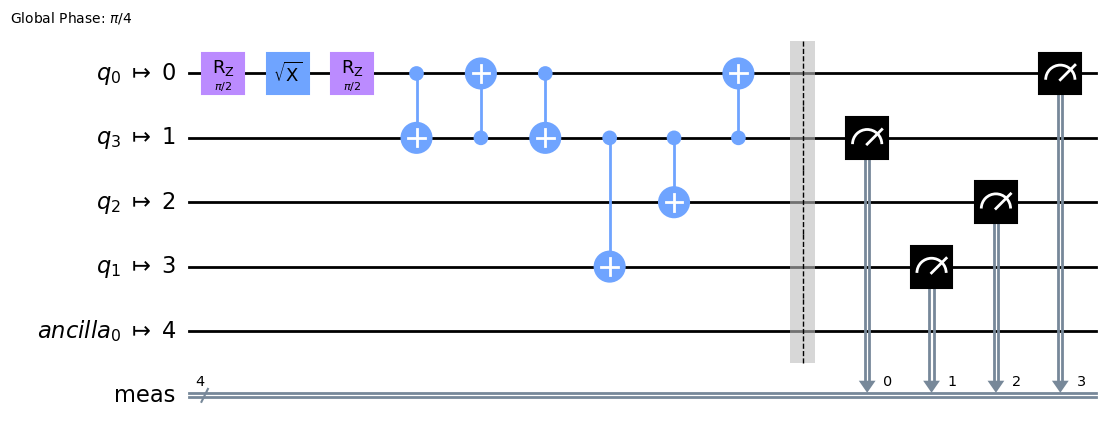

In [33]:
# example
qc_transT = transpile(qc, backendT, initial_layout=[0, 3, 2, 1])
qc_transT.draw('mpl')

### Optimization levels

Execute the cell below.

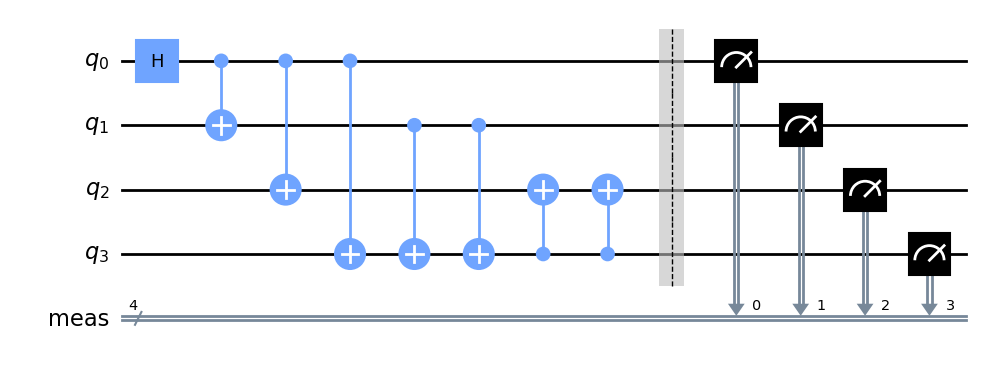

In [11]:
qc_silly = QuantumCircuit(4)
qc_silly.h(0)
qc_silly.cx(0, range(1, 4))
qc_silly.cx([1]*2, [3]*2)
qc_silly.cx([3]*2, [2]*2)
qc_silly.measure_all()

qc_silly.draw('mpl')

**Q. Transpile the circuit `qc_silly` for the `backendT` setting the parameter `optimization_level` from 0 to 3. Discuss the differences.**

optimization level : 0
number of CNOT : 13, circuit depth : 17


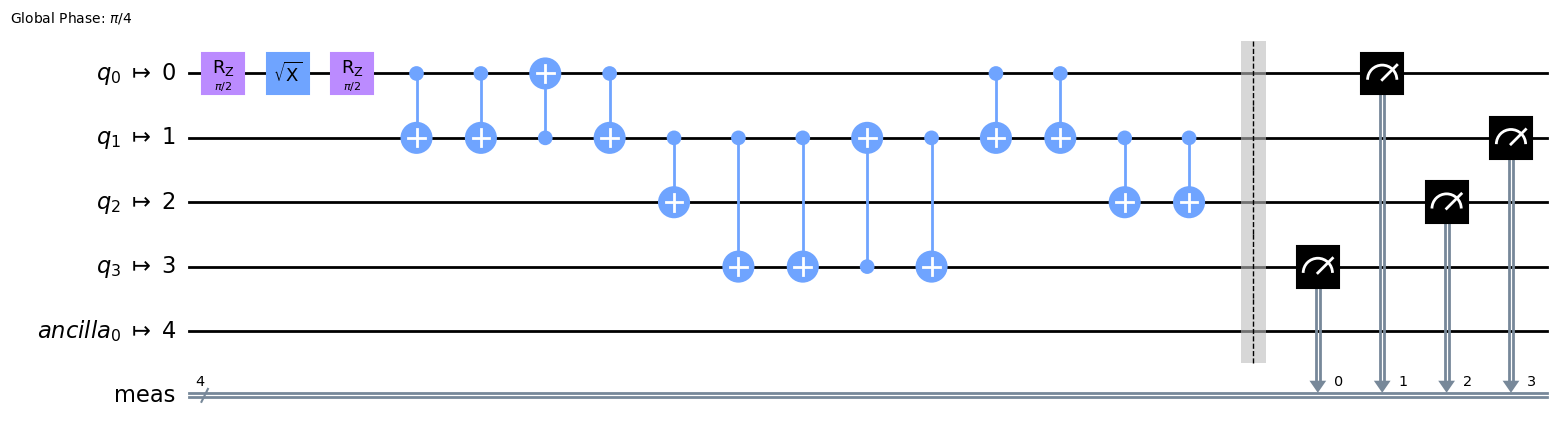

----------------------------------------------------------------------------
 
optimization level : 1
number of CNOT : 6, circuit depth : 10


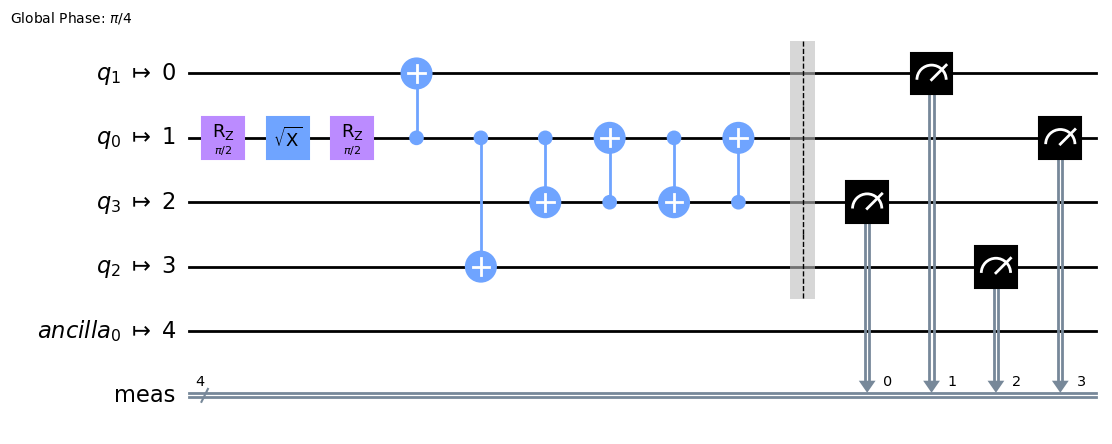

----------------------------------------------------------------------------
 
optimization level : 2
number of CNOT : 6, circuit depth : 10


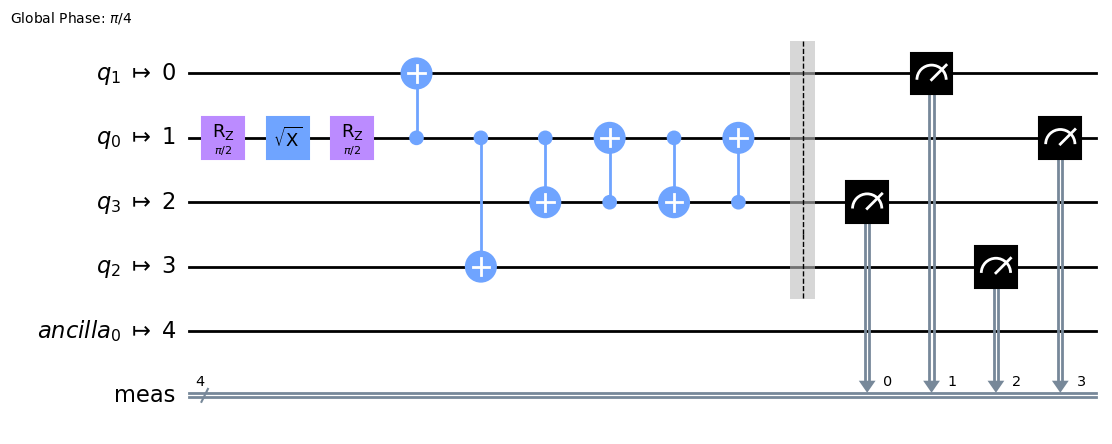

----------------------------------------------------------------------------
 
optimization level : 3
number of CNOT : 4, circuit depth : 11


/Users/hwajungkang/mambaforge/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/hwajungkang/mambaforge/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/hwajungkang/mambaforge/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/hwajungkang/mambaforge/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/hwajungkang/mambaforge/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/hwaju

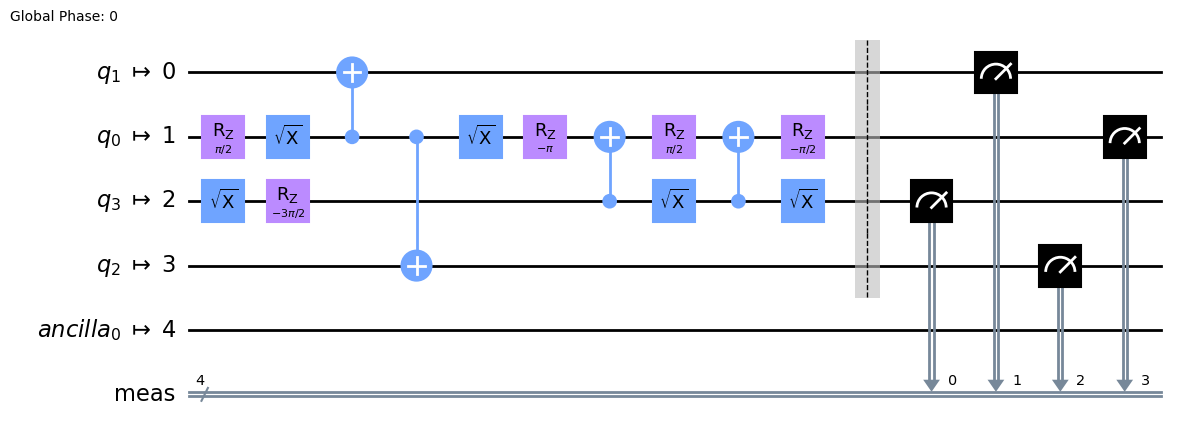

----------------------------------------------------------------------------
 


In [12]:
## your code goes here. 
qc_trans_all = []
for k in range(4):
    qc_trans = transpile(qc_silly, backendT, optimization_level=k)
    qc_trans_all.append(qc_trans)
    print('optimization level : {}'.format(k))
    print('number of CNOT : {}, circuit depth : {}'.format(qc_trans_all[k].num_nonlocal_gates(), qc_trans_all[k].depth()))
    display(qc_trans.draw('mpl', fold=-1))
    print('----------------------------------------------------------------------------')
    print(' ')

   **Q. Execute two transpiled circuits, one with optimization level 1 and the other with level 3, on backendT. Plot the result using `plot_distribution`.**

In [13]:
## your code goes here.
# execute both circuits together
job = backendT.run([qc_trans_all[1], qc_trans_all[3]]) #default shots=4000, optimization_level=1
print(job.job_id())

ciepfpmp0prapsngftfg


In [14]:
job = prov.retrieve_job('cgsn4982tle2vmrgca6g')

**Q. Compare the result fidelities using `hellinger_fidelity`.**

[hellinger_fidelity](https://qiskit.org/documentation/stubs/qiskit.quantum_info.hellinger_fidelity.html#qiskit.quantum_info.hellinger_fidelity)

fidelity of the result with opt level 0:0.717858959726434
fidelity of the result with opt level 3:0.7690244124750077


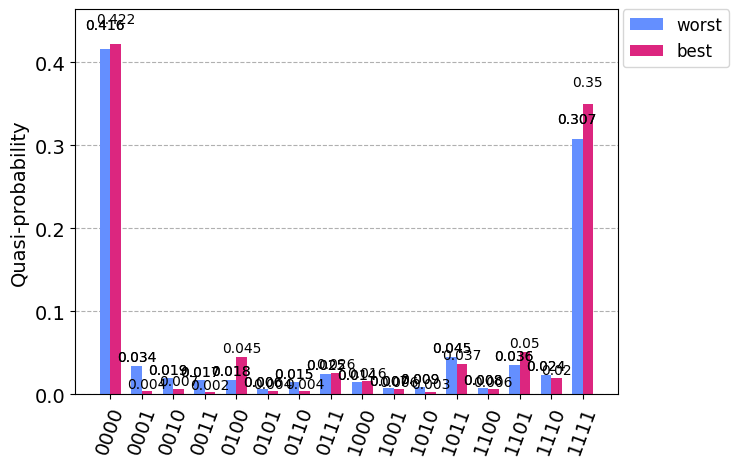

In [15]:
## your code goes here.

counts = job.result().get_counts()

print('fidelity of the result with opt level 0:{}'.format(hellinger_fidelity(counts_sim, counts[0])))
print('fidelity of the result with opt level 3:{}'.format(hellinger_fidelity(counts_sim, counts[1])))

plot_distribution(counts, legend=['worst', 'best'])

### Different topology

Run the following cell to set `backendL`.

In [16]:
backendL = prov.get_backend('ibmq_manila')

Check the `backendL` information using `plot_error_map` or [here](https://quantum-computing.ibm.com/services?services=systems&system=ibmq_manila).  

**Compare the topology of `quito` and `manila`.**

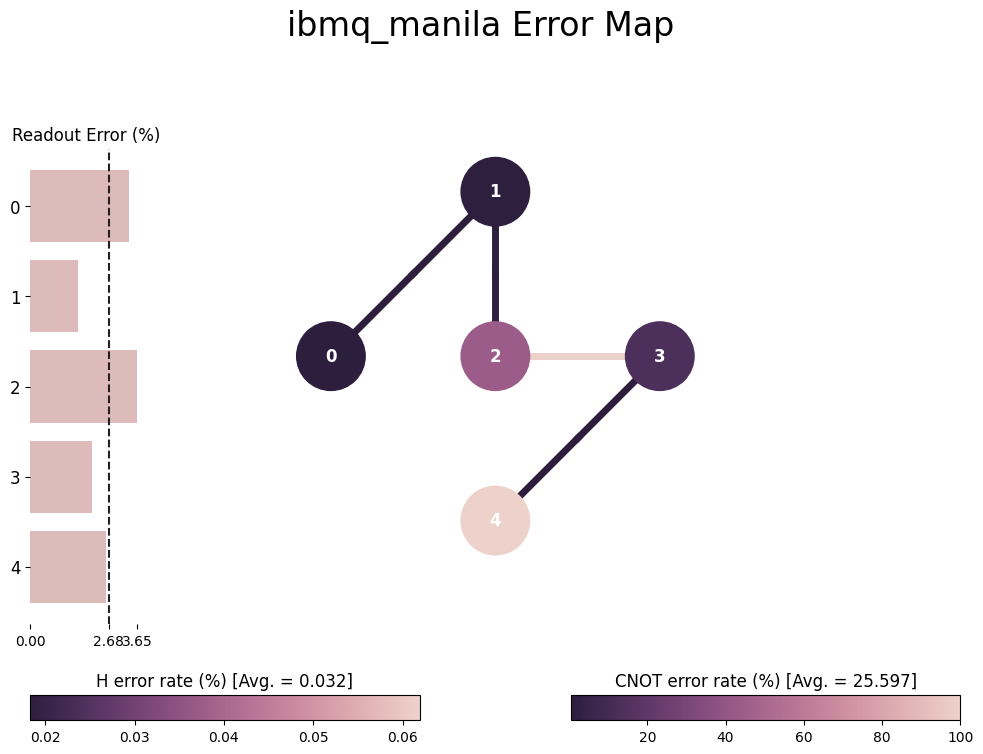

In [17]:
plot_error_map(backendL)

**Q. Transpile the circuit `qc` for `backendT` and `backendL`. Compare the number of cnot gates in the transpiled circuits.** 

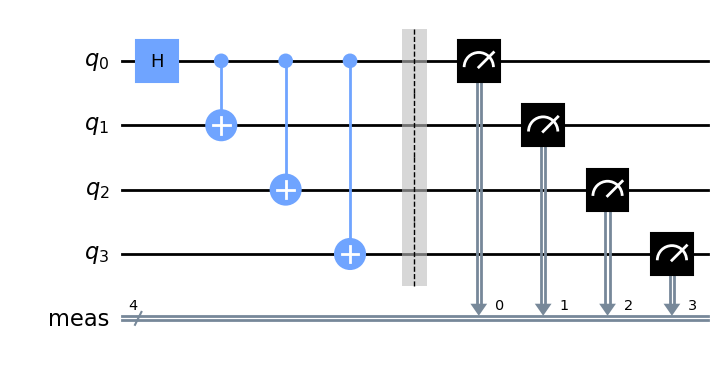

In [18]:
qc.draw('mpl')

number of CNOT gates for backendL: 6


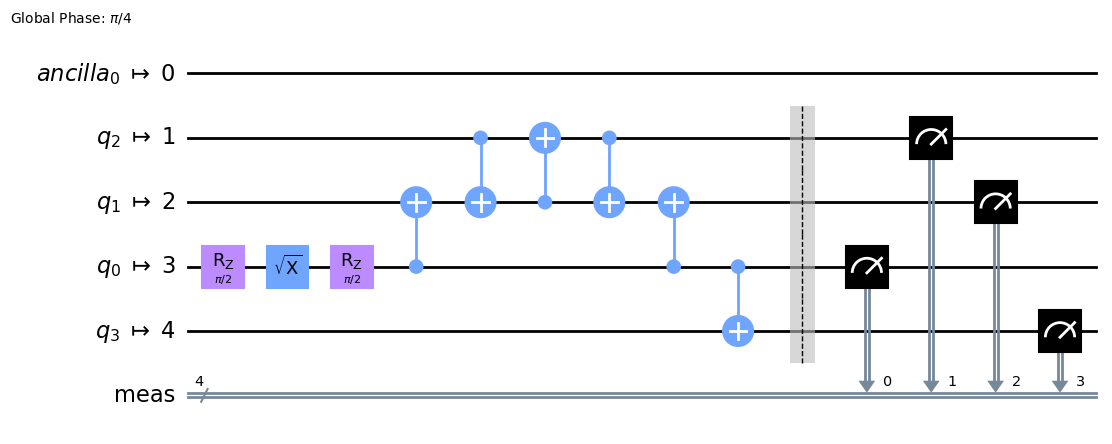

-----------------------------
 
number of CNOT gates for backendT: 3


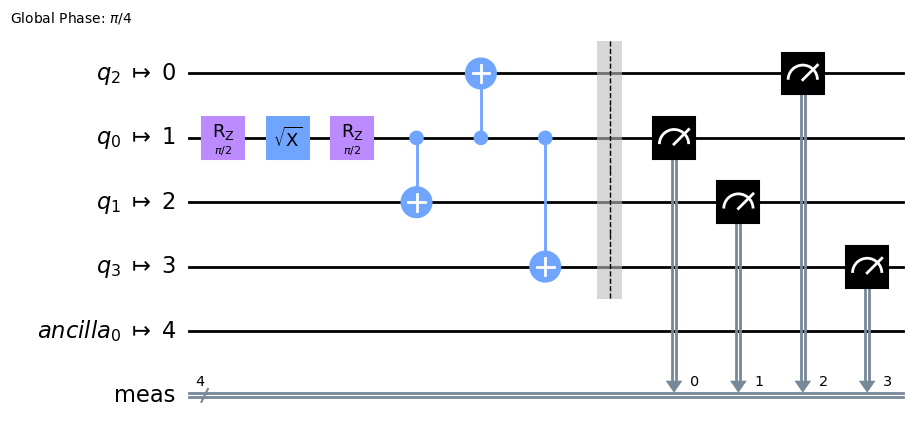

In [19]:
## your code/answer
qc_transL = transpile(qc, backendL, optimization_level=3)
qc_transT = transpile(qc, backendT, optimization_level=3)

print('number of CNOT gates for backendL: {}'.format(qc_transL.num_nonlocal_gates()))
display(qc_transL.draw('mpl', fold=-1))
print('-----------------------------')
print(' ')
print('number of CNOT gates for backendT: {}'.format(qc_transT.num_nonlocal_gates()))
display(qc_transT.draw('mpl', fold=-1))

**Q. Which physical qubits are mapped to which virtual qubits initially and finally?**

In [20]:
## your answer
# List of physical qubits mapped to the virtual qubits [0, 1, 2, 3]

# For backendT
Initial_layout = [] 
Final_mapping = []


# For backendL
Initial_layout = [] 
Final_mapping = []

**Q. Execute the each transpiled circuit on their corresponding quantum systems, `backendT` and `backendL`, respectively. Compare the fidelity of the results.**

In [21]:
## your code goes here
jobL, jobT = backendL.run(qc_transL), backendT.run(qc_transT)
print('jobL ID:{}'.format(jobL.job_id()))
print('jobT ID:{}'.format(jobT.job_id()))

jobL ID:ciepfq35n9v6ta6qrf5g
jobT ID:ciepfqm4c9s1cd64c4r0


fidelity of the result with line topolog:0.85019926969996
fidelity of the result with T-shape topolog:0.7962072924528427


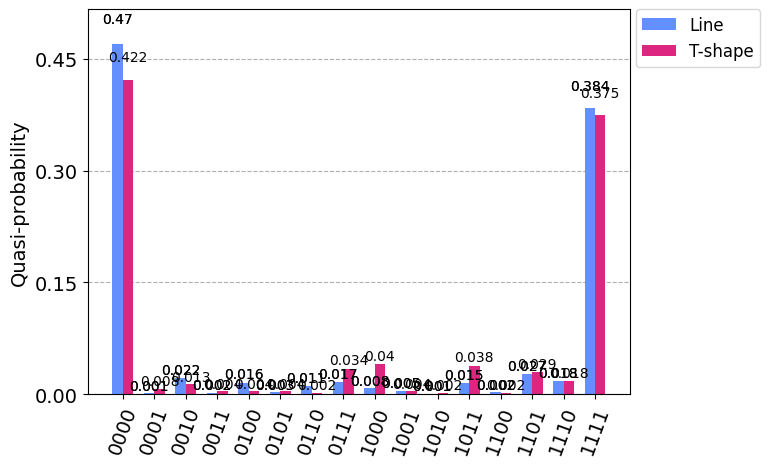

In [22]:
jobL = prov.retrieve_job('cgsrlo2j96cvh384kn1g')
jobT = prov.retrieve_job('cgsrlo2j96cvh384kn40')

countsL = jobL.result().get_counts()
countsT = jobT.result().get_counts()

print('fidelity of the result with line topolog:{}'.format(hellinger_fidelity(counts_sim, countsL)))
print('fidelity of the result with T-shape topolog:{}'.format(hellinger_fidelity(counts_sim, countsT)))

plot_distribution([countsL, countsT], legend=['Line', 'T-shape'])

Two different machines - different error profiles....

### Being Smart

**Q. Consider the 5 qubit GHZ state, $\frac{1}{\sqrt{2}}(|00000\rangle + |11111\rangle)$.
 Build a quantum circuit producing the 5Q GHZ state that is optimal for the topology of the backend, `ibmq_kolkata`, .e.g. minimize the transpiled circuit depth..**

In [23]:
backend = prov.get_backend('ibmq_kolkata')

In [24]:
## your code goes here
nq = 5

# worst
qc_worst = QuantumCircuit(nq)
qc_worst.h(0)
qc_worst.cx([0], range(1,nq))

# ok
qc_ok = QuantumCircuit(nq)
qc_ok.h(0)
qc_ok.cx(range(nq-1), range(1, nq))

# best
qc_best = QuantumCircuit(nq)
qc_best.h(2)
qc_best.cx(2, [1, 3])
qc_best.cx(1, 0)
qc_best.cx(3, 4)

# qc_best = QuantumCircuit(nq)
# qc_best.h(2)
# qc_best.cx(2, [1, 3, 4])
# qc_best.cx(1, 0)


print(qc_worst)
print(qc_ok)
print(qc_best)

     ┌───┐                    
q_0: ┤ H ├──■────■────■────■──
     └───┘┌─┴─┐  │    │    │  
q_1: ─────┤ X ├──┼────┼────┼──
          └───┘┌─┴─┐  │    │  
q_2: ──────────┤ X ├──┼────┼──
               └───┘┌─┴─┐  │  
q_3: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_4: ────────────────────┤ X ├
                         └───┘
     ┌───┐                    
q_0: ┤ H ├──■─────────────────
     └───┘┌─┴─┐               
q_1: ─────┤ X ├──■────────────
          └───┘┌─┴─┐          
q_2: ──────────┤ X ├──■───────
               └───┘┌─┴─┐     
q_3: ───────────────┤ X ├──■──
                    └───┘┌─┴─┐
q_4: ────────────────────┤ X ├
                         └───┘
               ┌───┐     
q_0: ──────────┤ X ├─────
          ┌───┐└─┬─┘     
q_1: ─────┤ X ├──■───────
     ┌───┐└─┬─┘          
q_2: ┤ H ├──■────■───────
     └───┘     ┌─┴─┐     
q_3: ──────────┤ X ├──■──
               └───┘┌─┴─┐
q_4: ───────────────┤ X ├
                    └───┘


In [25]:
qc_worst_trans = transpile(qc_worst, backend, optimization_level=3)
qc_ok_trans = transpile(qc_ok, backend, optimization_level=3)
qc_best_trans = transpile(qc_best, backend, optimization_level=3)

print(qc_worst_trans.depth())
print(qc_ok_trans.depth())
print(qc_best_trans.depth())

8
7
6


In [26]:
import qiskit.tools.jupyter
%qiskit_version_table